In [4]:
#Importar librerias necesarias
#%pip install funpymodeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl
import seaborn as sns

In [5]:
# Cargar el archivo CSV comprimido en formato .gz
Bologna= pd.read_csv('Bologna_listings.csv.gz', compression='gzip')

# Mostrar las primeras filas del DataFrame
Bologna.head()



,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,42196,https://www.airbnb.com/rooms/42196,20240622024440,2024-06-22,city scrape,50 sm Studio in the historic centre,The studio is a fully restored ancient basemen...,NaN,https://a0.muscache.com/pictures/4775726/68044...,184487,...,4.88,4.87,4.66,NaN,t,2,2,0,0,1.37
1,46352,https://www.airbnb.com/rooms/46352,20240622024440,2024-06-22,city scrape,A room in Pasolini's house,"Simple, cozy and silent room in a lived house ...",In the very nearby you have Via Saragozza and ...,https://a0.muscache.com/pictures/9f94acc3-98fc...,467810,...,4.85,4.84,4.67,NaN,f,2,0,2,0,2.55
2,85368,https://www.airbnb.com/rooms/85368,20240622024440,2024-06-22,city scrape,Garden House Bologna,NaN,NaN,https://a0.muscache.com/pictures/585815/331d45...,467675,...,4.98,4.80,4.81,NaN,f,1,1,0,0,0.40
3,145779,https://www.airbnb.com/rooms/145779,20240622024440,2024-06-22,city scrape,SINGLE ROOM,NaN,NaN,https://a0.muscache.com/pictures/76537876/27c6...,705535,...,4.91,4.99,4.85,NaN,f,7,0,7,0,0.49
4,204553,https://www.airbnb.com/rooms/204553,20240622024440,2024-06-22,city scrape,Private Room & Bath Ex-Convent in Centro Storico,The neighbourhood is the most prestigious of B...,"Safest, most central, quietest street in Bolog...",https://a0.muscache.com/pictures/36151297/8be9...,569422,...,4.93,4.97,4.86,NaN,f,2,1,1,0,1.71


In [6]:
#Identificar valores nulos por columna
# Ajustar maximo de filas
pd.options.display.max_rows = None
Valores_Nulos=Bologna.isnull().sum()
Columnas_Con_Nulos = Valores_Nulos[Valores_Nulos > 0]
Columnas_Con_Nulos

description                      132
neighborhood_overview           2019
host_location                   1423
host_about                      2571
host_response_time               359
host_response_rate               359
host_acceptance_rate             188
host_is_superhost                104
host_neighbourhood              4664
neighbourhood                   2019
neighbourhood_group_cleansed    4785
bathrooms                        201
bathrooms_text                     4
bedrooms                          47
beds                             205
price                            197
calendar_updated                4785
has_availability                  13
first_review                     471
last_review                      471
review_scores_rating             471
review_scores_accuracy           473
review_scores_cleanliness        473
review_scores_checkin            473
review_scores_communication      473
review_scores_location           473
review_scores_value              474
l

In [7]:
#Información tipos de columnas
Tipos_Columnas = Bologna[Columnas_Con_Nulos.index].dtypes
Columnas_Object = Tipos_Columnas[Tipos_Columnas == 'object']
Columnas_Object

description              object
neighborhood_overview    object
host_location            object
host_about               object
host_response_time       object
host_response_rate       object
host_acceptance_rate     object
host_is_superhost        object
host_neighbourhood       object
neighbourhood            object
bathrooms_text           object
price                    object
has_availability         object
first_review             object
last_review              object
license                  object
dtype: object

In [8]:
#Información tipos de columnas
Tipos_Columnas = Bologna[Columnas_Con_Nulos.index].dtypes
Columnas_Object = Tipos_Columnas[Tipos_Columnas == 'float']
Columnas_Object

neighbourhood_group_cleansed    float64
bathrooms                       float64
bedrooms                        float64
beds                            float64
calendar_updated                float64
review_scores_rating            float64
review_scores_accuracy          float64
review_scores_cleanliness       float64
review_scores_checkin           float64
review_scores_communication     float64
review_scores_location          float64
review_scores_value             float64
reviews_per_month               float64
dtype: object

In [9]:
#Realizamos una copia del dataframe
copia_Bologna = Bologna.copy()

In [10]:
#Cuarto método de sustitución de valores nulos
#Sustituir valores nulos por un string en  concreto
copia_Bologna["description"] = copia_Bologna["description"].fillna("DESCRIPCIÓN FALTANTE")
copia_Bologna["neighborhood_overview"] = copia_Bologna["neighborhood_overview"].fillna("SIN INFORMACIÓN")
copia_Bologna["picture_url"] = copia_Bologna["picture_url"].fillna("SIN IMAGEN")
copia_Bologna["host_name"] = copia_Bologna["host_name"].fillna("ANONIMO")
copia_Bologna["host_since"] = copia_Bologna["host_since"].fillna("SIN FECHA")
copia_Bologna["host_location"] = copia_Bologna["host_location"].fillna("SIN INFORMACIÓN")
copia_Bologna["host_about"] = copia_Bologna["host_about"].fillna("SIN INFORMACIÓN")
copia_Bologna["host_response_time"] = copia_Bologna["host_response_time"].fillna("SIN INFORMACIÓN")
copia_Bologna["host_response_rate"] = copia_Bologna["host_response_rate"].fillna("SIN INFORMACIÓN")
copia_Bologna["host_acceptance_rate"] = copia_Bologna["host_acceptance_rate"].fillna("SIN INFORMACIÓN")
copia_Bologna["host_is_superhost"] = copia_Bologna["host_is_superhost"].fillna("VALIDACIÓN PENDIENTE")
copia_Bologna["host_thumbnail_url"] = copia_Bologna["host_thumbnail_url"].fillna("MINIATURA NO DISPONIBLE")
copia_Bologna["host_picture_url"] = copia_Bologna["host_picture_url"].fillna("SIN IMAGEN")
copia_Bologna["host_neighbourhood"] = copia_Bologna["host_neighbourhood"].fillna("SIN INFORMACIÓN")
copia_Bologna["host_verifications"] = copia_Bologna["host_verifications"].fillna("VALIDACIÓN PENDIENTE")
copia_Bologna["host_has_profile_pic"] = copia_Bologna["host_has_profile_pic"].fillna("INFORMACIÓN FALTANTE")
copia_Bologna["host_identity_verified"] = copia_Bologna["host_identity_verified"].fillna("INFORMACIÓN FALTANTE")
copia_Bologna["neighbourhood"] = copia_Bologna["neighbourhood"].fillna("SIN INFORMACIÓN")
copia_Bologna["bathrooms_text"] = copia_Bologna["bathrooms_text"].fillna("SIN INFORMACIÓN")
copia_Bologna["price"] = copia_Bologna["price"].fillna("NO DEFINIDO")
copia_Bologna["has_availability"] = copia_Bologna["has_availability"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Bologna["first_review"] = copia_Bologna["first_review"].fillna("SIN RESEÑA")
copia_Bologna["last_review"] = copia_Bologna["last_review"].fillna("SIN RESEÑA")
copia_Bologna["license"] = copia_Bologna["license"].fillna("SIN LICENCIA")

In [11]:
#Primer método de sustitución de valores nulos
#Sustituir valores nulos con promedio o media
copia_Bologna["review_scores_rating"]=copia_Bologna["review_scores_rating"].fillna(round(copia_Bologna ['review_scores_rating'].mean(),1))
copia_Bologna["review_scores_accuracy"]=copia_Bologna["review_scores_accuracy"].fillna(round(copia_Bologna ['review_scores_accuracy'].mean(),1))
copia_Bologna["review_scores_cleanliness"]=copia_Bologna["review_scores_cleanliness"].fillna(round(copia_Bologna ['review_scores_cleanliness'].mean(),1))
copia_Bologna["review_scores_checkin"]=copia_Bologna["review_scores_checkin"].fillna(round(copia_Bologna ['review_scores_checkin'].mean(),1))
copia_Bologna["review_scores_communication"]=copia_Bologna["review_scores_communication"].fillna(round(copia_Bologna ['review_scores_communication'].mean(),1))
copia_Bologna["review_scores_location"]=copia_Bologna["review_scores_location"].fillna(round(copia_Bologna ['review_scores_location'].mean(),1))
copia_Bologna["review_scores_value"]=copia_Bologna["review_scores_value"].fillna(round(copia_Bologna ['review_scores_value'].mean(),1))
copia_Bologna["reviews_per_month"]=copia_Bologna["reviews_per_month"].fillna(round(copia_Bologna ['reviews_per_month'].mean(),1))
copia_Bologna["host_listings_count"]=copia_Bologna["host_listings_count"].fillna(round(copia_Bologna ['host_listings_count'].mean(),1))
copia_Bologna["host_total_listings_count"]=copia_Bologna["host_total_listings_count"].fillna(round(copia_Bologna ['host_total_listings_count'].mean(),1))

In [12]:
#Tercer método de sustitución de valores nulos
#Sustituir valores nulos por un valor numérico en  concreto
copia_Bologna["bathrooms"]=copia_Bologna["bathrooms"].fillna("-")
copia_Bologna["bedrooms"]=copia_Bologna["bedrooms"].fillna("-")
copia_Bologna["beds"]=copia_Bologna["beds"].fillna("-")
copia_Bologna["calendar_updated"]=copia_Bologna["calendar_updated"].fillna("-")

In [13]:
#Corroboramos valores nulos
# Ajustar maximo de filas
pd.options.display.max_rows = None
valores_nulos=copia_Bologna.isnull().sum()
valores_nulos

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
name                                               0
description                                        0
neighborhood_overview                              0
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          0
host_since                                         0
host_location                                      0
host_about                                         0
host_response_time                                 0
host_response_rate                                 0
host_acceptance_rate                               0
host_is_superhost                             

In [14]:
#Seleccionar variables relevantes
Bologna_variables = copia_Bologna[['listing_url', 'last_scraped', 'source', 'name', 'host_url', 'host_name', 'host_since', 'host_location', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'has_availability', 'number_of_reviews', 'review_scores_rating', 'instant_bookable', 'calculated_host_listings_count', 'reviews_per_month']]

In [15]:
Bologna_variables.head()

,listing_url,last_scraped,source,name,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,...,bedrooms,beds,amenities,price,has_availability,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count,reviews_per_month
0,https://www.airbnb.com/rooms/42196,2024-06-22,city scrape,50 sm Studio in the historic centre,https://www.airbnb.com/users/show/184487,Carlo,2010-07-29,"Milan, Italy",within an hour,100%,...,1.0,1.0,"[""Heating"", ""High chair"", ""Wifi"", ""Paid parkin...",$80.00,t,229,4.64,t,2,1.37
1,https://www.airbnb.com/rooms/46352,2024-06-22,city scrape,A room in Pasolini's house,https://www.airbnb.com/users/show/467810,Eleonora,2011-03-28,"Bologna, Italy",a few days or more,45%,...,1.0,1.0,"[""Heating"", ""Wifi"", ""Shampoo"", ""Single level h...",$42.00,t,427,4.72,f,2,2.55
2,https://www.airbnb.com/rooms/85368,2024-06-22,city scrape,Garden House Bologna,https://www.airbnb.com/users/show/467675,Anna Maria,2011-03-28,"Bologna, Italy",within a few hours,100%,...,2.0,5.0,"[""Host greets you"", ""Heating"", ""Wifi"", ""Hanger...",$120.00,t,60,4.91,f,1,0.40
3,https://www.airbnb.com/rooms/145779,2024-06-22,city scrape,SINGLE ROOM,https://www.airbnb.com/users/show/705535,Valerio,2011-06-15,"Bologna, Italy",within an hour,100%,...,1.0,1.0,"[""Heating"", ""Wifi"", ""Lock on bedroom door"", ""R...",$50.00,t,76,4.89,f,7,0.49
4,https://www.airbnb.com/rooms/204553,2024-06-22,city scrape,Private Room & Bath Ex-Convent in Centro Storico,https://www.airbnb.com/users/show/569422,Elizabeth,2011-05-09,"Bologna, Italy",within an hour,100%,...,2.0,2.0,"[""Heating"", ""Wifi"", ""Lock on bedroom door"", ""S...",$84.00,t,267,4.90,f,2,1.71


ELIMINAR OUTLIERS POR DESVIACION ESTANDAR

In [16]:
Bologna_variables.dtypes

listing_url                        object
last_scraped                       object
source                             object
name                               object
host_url                           object
host_name                          object
host_since                         object
host_location                      object
host_response_time                 object
host_response_rate                 object
host_acceptance_rate               object
host_is_superhost                  object
host_neighbourhood                 object
host_verifications                 object
host_has_profile_pic               object
host_identity_verified             object
neighbourhood_cleansed             object
property_type                      object
room_type                          object
accommodates                        int64
bathrooms_text                     object
bedrooms                           object
beds                               object
amenities                         

In [17]:
#Separar por columnas cualitativas y cuantitativas
columnas_cualitativas = Bologna_variables.select_dtypes(include = 'object')
columnas_cuantitativas = Bologna_variables.select_dtypes(include = ['int64', 'float64'])

<Figure size 2000x1000 with 0 Axes>

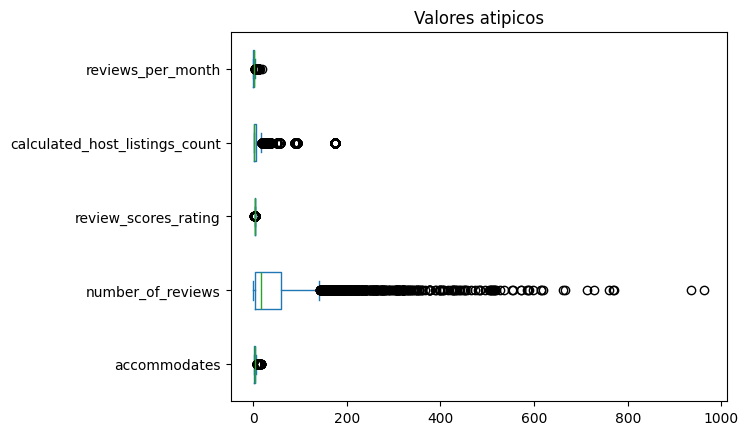

In [18]:
#Hacer un boxplot de valores atipicos de las columnas cuantitativas
fig = plt.figure(figsize = (20, 10))
columnas_cuantitativas.plot(kind = 'box', vert = False)
plt.title("Valores atipicos")
plt.show()

In [19]:
y = columnas_cuantitativas
Limite_superior = y.mean() + 3*y.std()
Limite_inferior = y.mean() - 3*y.std()
print("Limite superior permitido", Limite_superior)
print("Limite inferior permitido", Limite_inferior)

Limite superior permitido accommodates                        8.377417
number_of_reviews                 307.907011
review_scores_rating                5.700131
calculated_host_listings_count    124.734441
reviews_per_month                   6.970498
dtype: float64
Limite inferior permitido accommodates                       -1.593718
number_of_reviews                -206.746718
review_scores_rating                3.763597
calculated_host_listings_count    -93.616782
reviews_per_month                  -3.448818
dtype: float64


In [20]:
#Filtrar solo por columnas dentro de los limites
columnas_cuantitativas_sin_outliers = columnas_cuantitativas[(y <= Limite_superior) & (y >= Limite_inferior)]

In [21]:
#Revisar valores nulos
valores_nulos_cuantitativo = columnas_cuantitativas_sin_outliers.isnull().sum()
valores_nulos_cuantitativo

accommodates                       57
number_of_reviews                 116
review_scores_rating               81
calculated_host_listings_count    174
reviews_per_month                  96
dtype: int64

In [22]:
#Hacer una copia del dataframe y rellenar los valores nulos con la media
columnas_cuantitativas_limpio = columnas_cuantitativas_sin_outliers.copy()
columnas_cuantitativas_limpio = columnas_cuantitativas_limpio.fillna(round(columnas_cuantitativas_sin_outliers.mean(), 1))

In [23]:
#Se juntan las columnas cualitativas con las cuantitativas
Bologna_outliers = pd.concat([columnas_cuantitativas_limpio, columnas_cualitativas], axis = 1)
Bologna_outliers.head()

,accommodates,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month,listing_url,last_scraped,source,name,host_url,...,neighbourhood_cleansed,property_type,room_type,bathrooms_text,bedrooms,beds,amenities,price,has_availability,instant_bookable
0,2.0,229.0,4.64,2.0,1.37,https://www.airbnb.com/rooms/42196,2024-06-22,city scrape,50 sm Studio in the historic centre,https://www.airbnb.com/users/show/184487,...,Santo Stefano,Entire rental unit,Entire home/apt,1 bath,1.0,1.0,"[""Heating"", ""High chair"", ""Wifi"", ""Paid parkin...",$80.00,t,t
1,2.0,40.9,4.72,2.0,2.55,https://www.airbnb.com/rooms/46352,2024-06-22,city scrape,A room in Pasolini's house,https://www.airbnb.com/users/show/467810,...,Porto - Saragozza,Private room in rental unit,Private room,1 shared bath,1.0,1.0,"[""Heating"", ""Wifi"", ""Shampoo"", ""Single level h...",$42.00,t,f
2,5.0,60.0,4.91,1.0,0.40,https://www.airbnb.com/rooms/85368,2024-06-22,city scrape,Garden House Bologna,https://www.airbnb.com/users/show/467675,...,Santo Stefano,Entire rental unit,Entire home/apt,2 baths,2.0,5.0,"[""Host greets you"", ""Heating"", ""Wifi"", ""Hanger...",$120.00,t,f
3,1.0,76.0,4.89,7.0,0.49,https://www.airbnb.com/rooms/145779,2024-06-22,city scrape,SINGLE ROOM,https://www.airbnb.com/users/show/705535,...,Porto - Saragozza,Private room in rental unit,Private room,1 shared bath,1.0,1.0,"[""Heating"", ""Wifi"", ""Lock on bedroom door"", ""R...",$50.00,t,f
4,1.0,267.0,4.90,2.0,1.71,https://www.airbnb.com/rooms/204553,2024-06-22,city scrape,Private Room & Bath Ex-Convent in Centro Storico,https://www.airbnb.com/users/show/569422,...,Porto - Saragozza,Private room in rental unit,Private room,2.5 baths,2.0,2.0,"[""Heating"", ""Wifi"", ""Lock on bedroom door"", ""S...",$84.00,t,f


In [24]:
#Comprobamos que no existan valores nulos
valores_nulos_Bologna_outliers = Bologna_outliers.isnull().sum()
valores_nulos_Bologna_outliers

accommodates                      0
number_of_reviews                 0
review_scores_rating              0
calculated_host_listings_count    0
reviews_per_month                 0
listing_url                       0
last_scraped                      0
source                            0
name                              0
host_url                          0
host_name                         0
host_since                        0
host_location                     0
host_response_time                0
host_response_rate                0
host_acceptance_rate              0
host_is_superhost                 0
host_neighbourhood                0
host_verifications                0
host_has_profile_pic              0
host_identity_verified            0
neighbourhood_cleansed            0
property_type                     0
room_type                         0
bathrooms_text                    0
bedrooms                          0
beds                              0
amenities                   

Realizar la extracción de características de las siguientes columnas categóricas: (host_response_time, host_acceptance_rate, property_type, room_type, amenities y host_is_superhost)

In [25]:
#Extraer características de análisis univariado y generar tabla de frecuencias
freq_tbl(Bologna_outliers)
Bologna_outliers.dtypes

                                           listing_url  frequency  percentage  \
0                   https://www.airbnb.com/rooms/42196          1    0.000209   
1      https://www.airbnb.com/rooms/863450671053956366          1    0.000209   
2      https://www.airbnb.com/rooms/862808285698762851          1    0.000209   
3      https://www.airbnb.com/rooms/862343801186928107          1    0.000209   
4      https://www.airbnb.com/rooms/862063661098610146          1    0.000209   
5      https://www.airbnb.com/rooms/862062942178910997          1    0.000209   
6      https://www.airbnb.com/rooms/862014883481931417          1    0.000209   
7      https://www.airbnb.com/rooms/861549412052395591          1    0.000209   
8      https://www.airbnb.com/rooms/861361127982405669          1    0.000209   
9      https://www.airbnb.com/rooms/861269379323075618          1    0.000209   
10     https://www.airbnb.com/rooms/860856802741760129          1    0.000209   
11     https://www.airbnb.co

accommodates                      float64
number_of_reviews                 float64
review_scores_rating              float64
calculated_host_listings_count    float64
reviews_per_month                 float64
listing_url                        object
last_scraped                       object
source                             object
name                               object
host_url                           object
host_name                          object
host_since                         object
host_location                      object
host_response_time                 object
host_response_rate                 object
host_acceptance_rate               object
host_is_superhost                  object
host_neighbourhood                 object
host_verifications                 object
host_has_profile_pic               object
host_identity_verified             object
neighbourhood_cleansed             object
property_type                      object
room_type                         

Text(0.5, 1.0, 'Tiempo de respuesta del host')

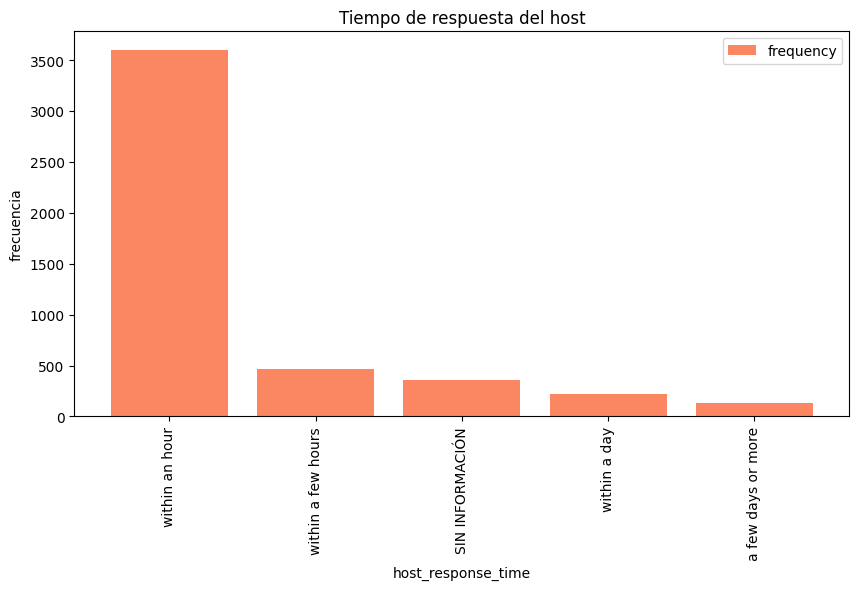

In [26]:
tabla1=freq_tbl(Bologna_outliers["host_response_time"])
filtro1=tabla1[tabla1["frequency"]>1]
filtro1_index=filtro1.set_index("host_response_time")
filtro1_index_freq=filtro1_index.drop(["percentage", "cumulative_perc"], axis=1)
filtro1_index_freq.plot(kind="bar", width=.8, figsize=(10,5), color="#fa8762")
plt.ylabel("frecuencia")
plt.title("Tiempo de respuesta del host")

Text(0.5, 1.0, 'índice de aceptación de anfitriones')

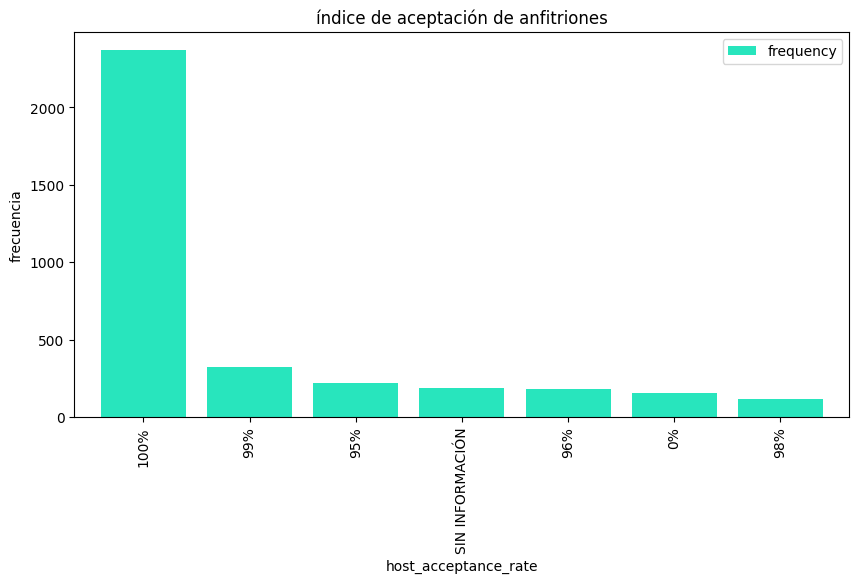

In [27]:
tabla2=freq_tbl(Bologna_outliers["host_acceptance_rate"])
filtro2=tabla2[tabla2["frequency"]>100]
filtro2_index=filtro2.set_index("host_acceptance_rate")
filtro2_index_freq=filtro2_index.drop(["percentage", "cumulative_perc"], axis=1)
filtro2_index_freq.plot(kind="bar", width=.8, figsize=(10,5), color="#28e5bd")
plt.ylabel("frecuencia")
plt.title("índice de aceptación de anfitriones")

Text(0.5, 1.0, 'Tipo de propiedad')

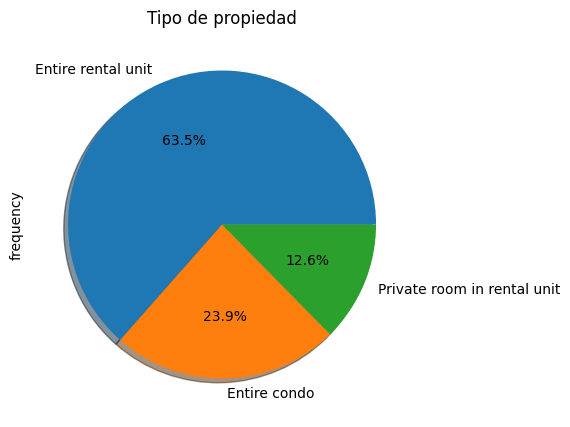

In [28]:
tabla3=freq_tbl(Bologna_outliers["property_type"])
filtro3=tabla3[tabla3["frequency"]>400]
filtro3_index=filtro3.set_index("property_type")
filtro3_index["frequency"].plot(kind="pie", figsize=(10,5),shadow=True, autopct='%1.1f%%' )
plt.title("Tipo de propiedad")

Text(0.5, 1.0, 'Tipo de cuarto')

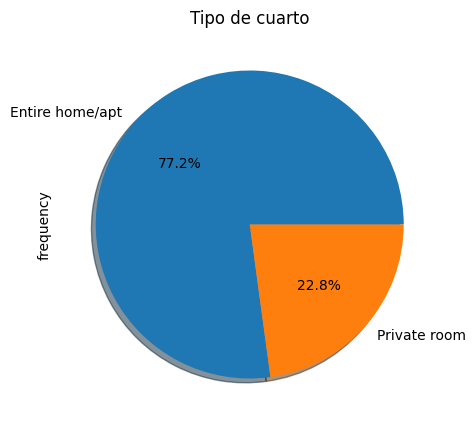

In [29]:
tabla4=freq_tbl(Bologna_outliers["room_type"])
filtro4=tabla4[tabla4["frequency"]>300]
filtro4_index=filtro4.set_index("room_type")
filtro4_index["frequency"].plot(kind="pie", figsize=(10,5),shadow=True, autopct='%1.1f%%' )
plt.title("Tipo de cuarto")

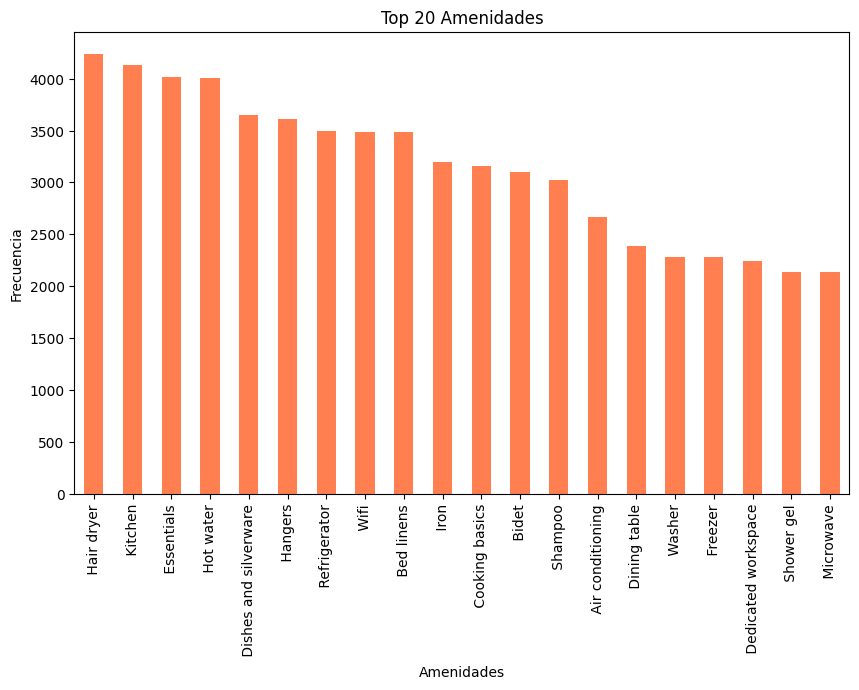

In [34]:
# Dado que 'amenities' es una lista de elementos, contaremos la frecuencia de cada amenidad
# Primero, descomponer la lista de amenidades
Bologna_outliers['amenities'] = Bologna_outliers['amenities'].str.strip('[]').str.replace('"', '').str.split(',')

# Convertir la lista de amenidades en una Serie de amenidades individuales
amenities_series = Bologna_outliers['amenities'].explode()

plt.figure(figsize=(10, 6))
amenities_series.value_counts().head(20).plot(kind='bar', color='coral') 
# Mostrar las 20 amenidades más comunes
plt.title('Top 20 Amenidades')
plt.xlabel('Amenidades')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()


Text(0.5, 1.0, 'El host es superhost')

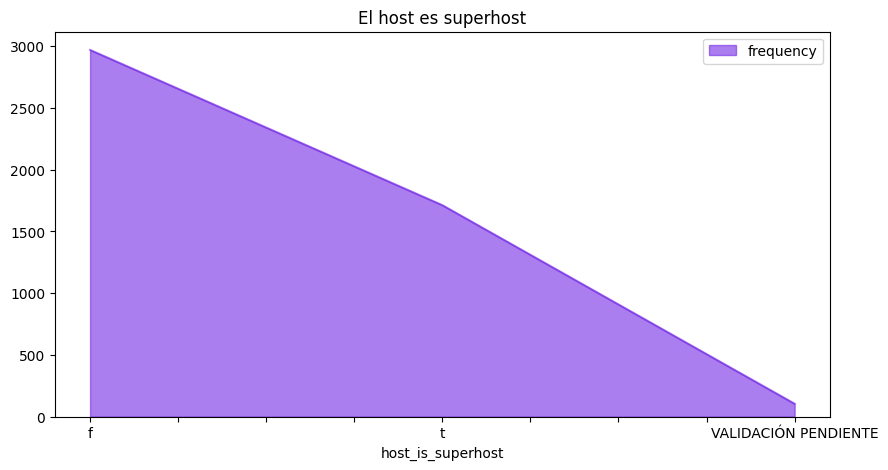

In [33]:
tabla6=freq_tbl(Bologna_outliers["host_is_superhost"])
filtro6=tabla6[tabla6["frequency"]>1]
filtro6_index=filtro6.set_index("host_is_superhost")
filtro6_index_freq=filtro6_index.drop(["percentage", "cumulative_perc"], axis=1)
filtro6_index_freq.plot(kind="area", figsize=(10,5), alpha=.6, color="#7328e5")
plt.title("El host es superhost")

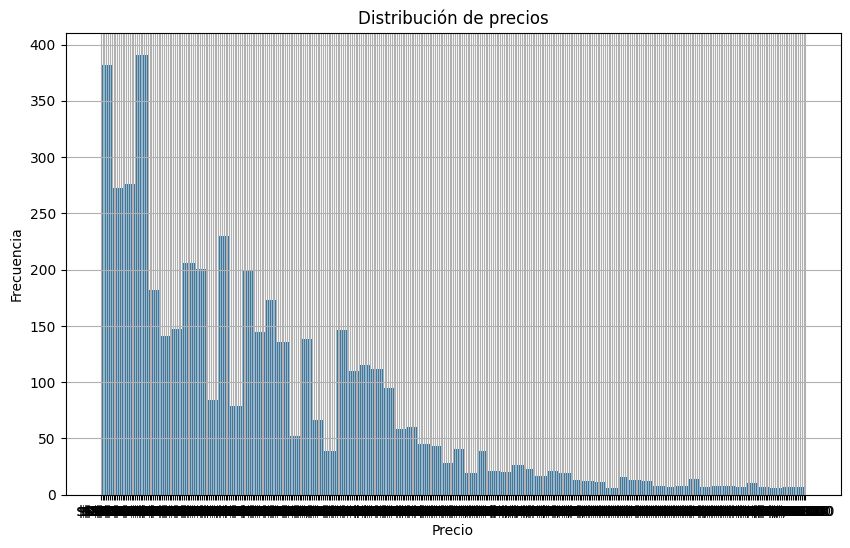

In [46]:
# Generar gráficos descriptivos
plt.figure(figsize=(10, 6))
Bologna_outliers['price'].hist(bins=50)
plt.title('Distribución de precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

Correlación

In [35]:
#Encontramos todas las correlaciones entre las variables y convertimos a valor absoluto
Corr_Factors=columnas_cuantitativas_limpio.corr()
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,accommodates,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month
accommodates,1.000000,0.024031,0.023816,0.114625,0.001669
number_of_reviews,0.024031,1.000000,0.106051,0.093594,0.377533
review_scores_rating,0.023816,0.106051,1.000000,0.299279,0.115977
calculated_host_listings_count,0.114625,0.093594,0.299279,1.000000,0.090554
reviews_per_month,0.001669,0.377533,0.115977,0.090554,1.000000


<Axes: >

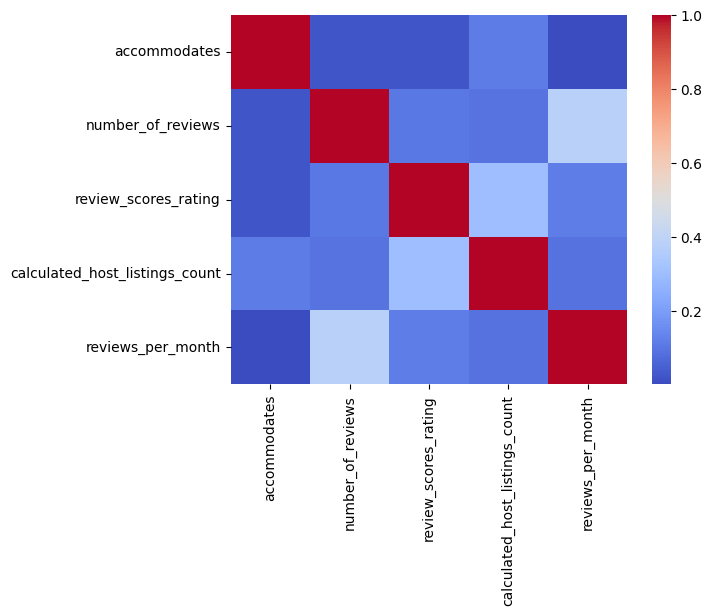

In [36]:
#Mapa de calor
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'coolwarm')
Heat_Map

In [37]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= columnas_cuantitativas_limpio[['reviews_per_month']]
Var_Dep= columnas_cuantitativas_limpio['number_of_reviews']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [38]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([15.28278371]),
 'rank_': 1,
 'singular_': array([96.43741027]),
 'intercept_': 16.21335917365936}

0.3775325950706366

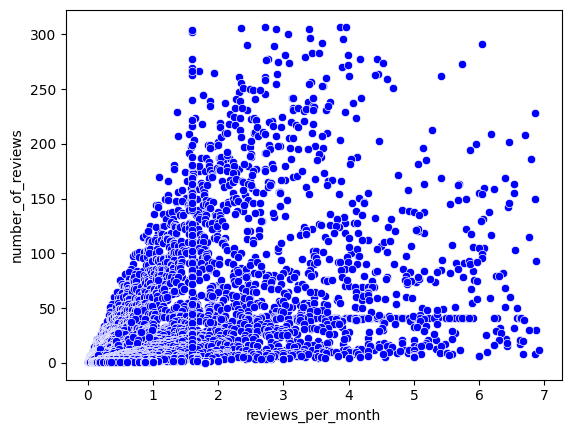

In [39]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
sns.scatterplot(x='reviews_per_month', y='number_of_reviews', color="blue", data=columnas_cuantitativas_limpio)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

In [40]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep2= columnas_cuantitativas_limpio[['calculated_host_listings_count']]
Var_Dep2= columnas_cuantitativas_limpio['review_scores_rating']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model2= LinearRegression()

In [41]:
#Ajustamos el modelo con las variables antes declaradas
model2.fit(X=Vars_Indep2, y=Var_Dep2)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['calculated_host_listings_count'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.00366094]),
 'rank_': 1,
 'singular_': array([1342.72832993]),
 'intercept_': 4.7945496154471865}

0.29927893787685855

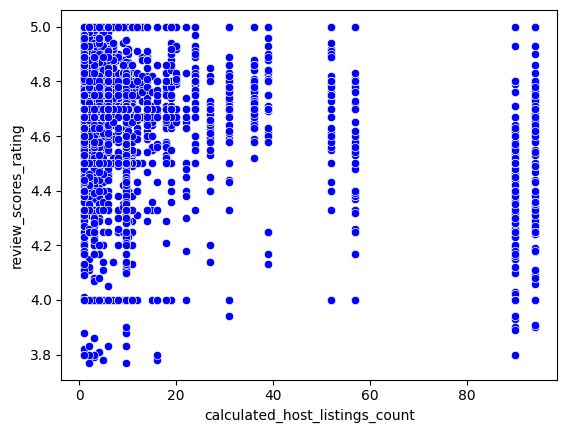

In [42]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
sns.scatterplot(x='calculated_host_listings_count', y='review_scores_rating', color="blue", data=columnas_cuantitativas_limpio)
coef_Deter2=model2.score(X=Vars_Indep2, y=Var_Dep2)
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

Modelo 3

In [49]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep3= columnas_cuantitativas_limpio[['review_scores_rating']]
Var_Dep3= columnas_cuantitativas_limpio['calculated_host_listings_count']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model3= LinearRegression()

In [50]:
#Ajustamos el modelo con las variables antes declaradas
model3.fit(X=Vars_Indep3, y=Var_Dep3)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_rating'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-24.46581944]),
 'rank_': 1,
 'singular_': array([16.42496829]),
 'intercept_': 126.02511467893551}

0.2992789378768584

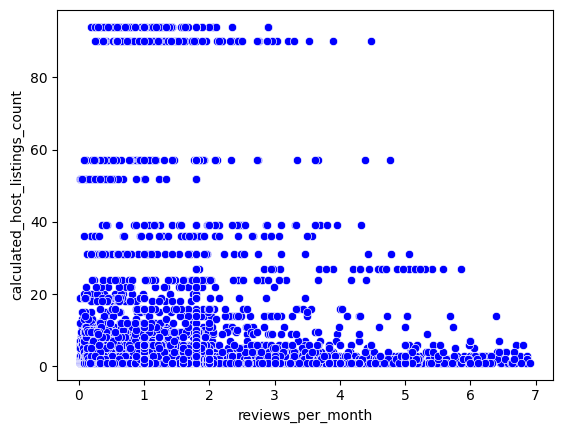

In [51]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
sns.scatterplot(x='reviews_per_month', y='calculated_host_listings_count', color="blue", data=columnas_cuantitativas_limpio)
coef_Deter3=model3.score(X=Vars_Indep3, y=Var_Dep3)
coef_Correl3=np.sqrt(coef_Deter3)
coef_Correl3

Regresion multiple

In [53]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_IndepM= columnas_cuantitativas_limpio[["number_of_reviews",	"review_scores_rating","calculated_host_listings_count",	"reviews_per_month"]]
Var_DepM= columnas_cuantitativas_limpio['accommodates']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelM= LinearRegression()

In [54]:
#Ajustamos el modelo con las variables antes declaradas
modelM.fit(X=Vars_IndepM, y=Var_DepM)

modelM.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_rating',
        'calculated_host_listings_count', 'reviews_per_month'],
       dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 0.00086859,  0.05121196,  0.00868387, -0.00166039]),
 'rank_': 4,
 'singular_': array([3906.31508758, 1336.06797885,   89.14238931,   15.58171624]),
 'intercept_': 2.9380210974697074}

In [55]:
coef_DeterM=modelM.score(X=Vars_IndepM, y=Var_DepM)
coef_CorrelM=np.sqrt(coef_DeterM)
coef_CorrelM

0.12011104713839113

<Axes: xlabel='number_of_reviews', ylabel='accommodates'>

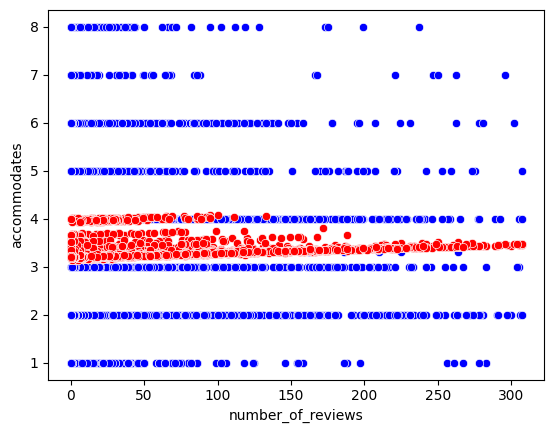

In [61]:
#Modelo predictivo
# Generar las predicciones
y_pred = modelM.predict(X=columnas_cuantitativas_limpio[["number_of_reviews", "review_scores_rating", "calculated_host_listings_count", "reviews_per_month"]])

# Insertar las predicciones en el DataFrame
columnas_cuantitativas_limpio['Predicciones'] = y_pred

# Graficar
sns.scatterplot(x='number_of_reviews', y='accommodates', color="blue", data=columnas_cuantitativas_limpio)
sns.scatterplot(x='number_of_reviews', y='Predicciones', color="red", data=columnas_cuantitativas_limpio)